
$$\tau_{cb} = \exp[(\ln(M)-offset)/slope]$$

### ROMS/Nonlinear/Sediment/sed_bed_cohesive.F (COAWST v. 1085)

!  Calculate representative critical shear stress profile
!  Note that the values are for the TOP of the layer...we
!  assume the bottom of the bottom layer has tcr = tcr_max
          tcr(1) = tcr_min(ng)
          DO k=2,Nbed
             tcr(k) = tcr_min(ng)
             IF (bmz(k-1).GT.eps) THEN
                tcr(k) = exp((log(bmz(k-1))-                            &
     &                    tcr_off(ng))/                                 &
     &                    tcr_slp(ng))
             ENDIF
             tcr(k) = MIN( MAX( tcr(k), tcr_min(ng)), tcr_max(ng) )
          ENDDO


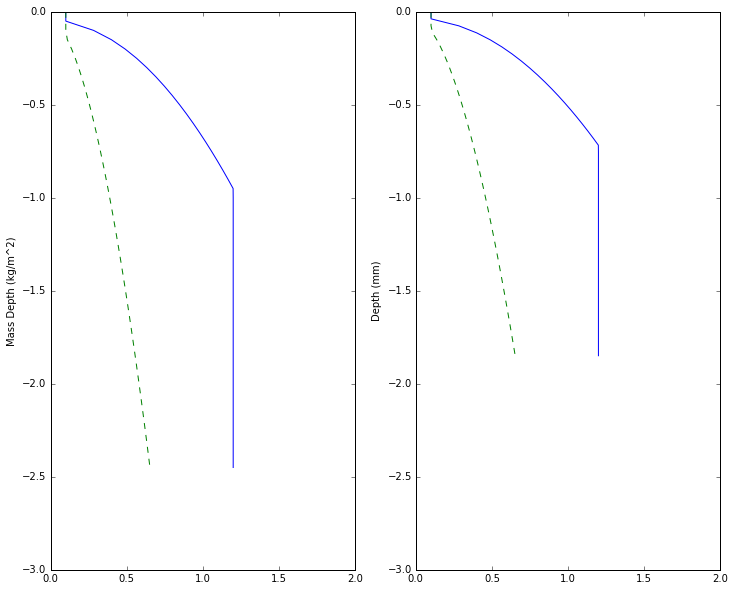

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
tcr_min = 0.1
tcr_max = 1.2
tcr_slp = 2.
tcr_off = -4.69e-1
eps = 1e-8
rhos = 2650.
cb = 0.5
bmz = np.arange(0.,2.5,0.05)
zb = bmz/(rhos*cb)
Nbed = len(bmz)
tcr = np.zeros_like(bmz)
tcr2 = np.zeros_like(bmz)
tcr[0] = tcr_min
tcr2[0] = tcr_min
for k in range(1,Nbed) :
    tcr[k] = tcr_min
    if(bmz[k-1] >= eps) :
        tcr[k] = np.exp((np.log(bmz[k-1])-tcr_off)/tcr_slp)
        tcr2[k] = 0.4*bmz[k-1]**0.56
    tcr[k] = min( max( tcr[k], tcr_min), tcr_max )
    tcr2[k] = min( max( tcr2[k], tcr_min), tcr_max )
    
fig = plt.figure(figsize=(12,10))
ax=fig.add_subplot(1,2,1)
plt.plot(tcr,-bmz,tcr2,-bmz,'--')
plt.axis([0, 2, -3, 0])
plt.ylabel('Mass Depth (kg/m^2)')
ax=fig.add_subplot(1,2,2)
plt.plot(tcr,-zb*1000,tcr2,-zb*1000,'--')
plt.axis([0, 2, -3, 0])
plt.ylabel('Depth (mm)')

In [5]:
whos

Variable   Type       Data/Info
-------------------------------
Nbed       int        10
bmz        ndarray    1: 1 elems, type `float64`, 8 bytes
k          int        1
tcr        ndarray    1: 1 elems, type `float64`, 8 bytes
tcr_max    float      1.2
tcr_min    float      0.1
tcr_off    float      -0.469
tcr_slp    float      2.0


In [36]:
# UGEMS stress time series
dtt = np.array([ 30., 20., 20. ,20.,20.,20.,20.,20.])
tt =  np.cumsum(60.*dtt)
taulevels = np.array([0.01, 0.08, 0.16, 0.24, 0.32, 0.40, 0.48, 0.60])
print tt,taulevels
print(tt[-1])
t = np.arange(0,tt[-1],60)
#dt = np.diff(t)
#dt = np.concatenate([dt,dt[:]])
tau = np.zeros_like(t)
for i in np.arange(len(tau)):
    for j in np.arange(len(taulevels)):
        if t[i]>tt[j]:
            tau[i]=taulevels[j]

[  1800.   3000.   4200.   5400.   6600.   7800.   9000.  10200.] [ 0.01  0.08  0.16  0.24  0.32  0.4   0.48  0.6 ]
10200.0
(170L,)


In [42]:
E = np.zeros_like(t)
m = np.zeros_like(t)
M = 5e-4;
for i in np.arange(len(t)-1):
    # functional relationship of tauc(m) from lookup table
    tc = np.interp(m[i], bmz, tcr)
    E = 0.
    if(tau[i]>=tc):
        E = M*(tau[i]-tc)
    dt = t[i+1]-t[i]
    m[i+1]= m[i]+E*dt

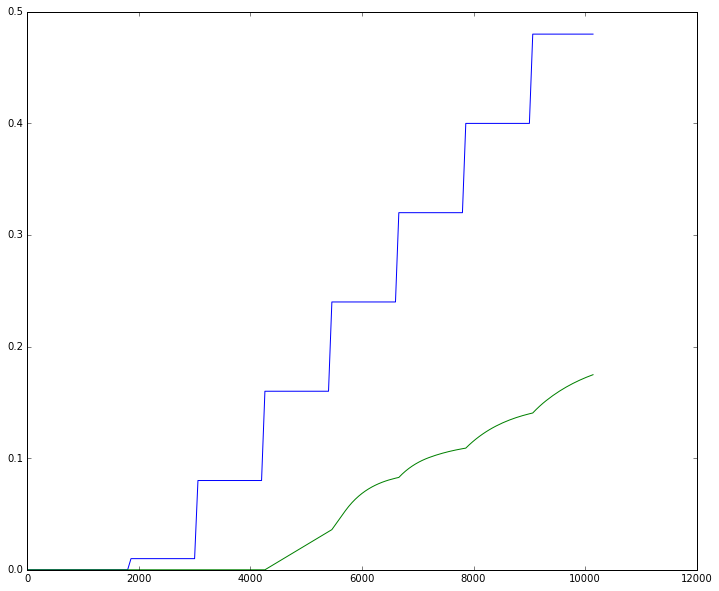

In [43]:
fig = plt.figure(figsize=(12,10))
plt.plot(t,tau)
plt.plot(t,m)

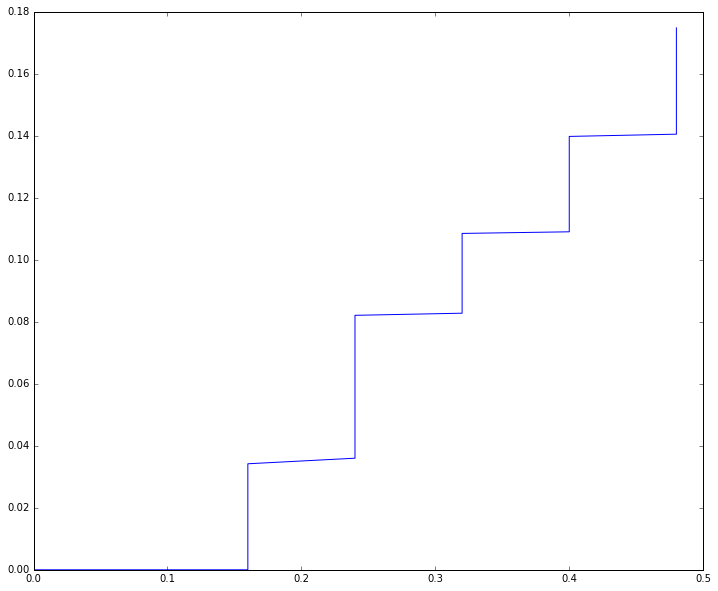

In [44]:
fig = plt.figure(figsize=(12,10))
plt.plot(tau,m)